In [1]:
%%time
import pickle 
import pandas as pd
import numpy as np
import math
my_data = pd.read_pickle("5log_signature_1cyclePerSec_2015_weeks_8_9")
#drop column of ones
columns = 1 + np.arange(my_data.shape[1] - 1)
my_data = my_data[columns]

#get features
features = 1 + np.arange(my_data.shape[1] - 1)
X, y = my_data[features], my_data[my_data.shape[1]]

#train dev test 60 20 20
breakpoint1 = int(0.6 * my_data.shape[0])
breakpoint2 = int(0.8 * my_data.shape[0])

X_train, y_train = X[:breakpoint1], y[:breakpoint1]

X_dev, y_dev = X[breakpoint1:breakpoint2], y[breakpoint1:breakpoint2]

X_test, y_test = X[breakpoint2:], y[breakpoint2:]

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42, max_features = math.ceil(math.sqrt(len(features))))
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

rf.fit(X_train, y_train)

y_pred_dev = rf.predict(X_dev)
y_pred_train = rf.predict(X_train)

from sklearn import metrics
#print("Validation accuracy ", metrics.accuracy_score(y_dev, y_pred_dev))
#print("Accuracy:",metrics.accuracy_score(y_dev, y_pred_dev))
print("Training error: " + str(round( (1 - metrics.accuracy_score(y_train, y_pred_train) )*100, 2)) + "%") 
print("Validation error: " + str(round( (1 - metrics.accuracy_score(y_dev, y_pred_dev) )*100, 2)) + "%") 


importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];




Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 9,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
CPU times: user 3.66 s, sys: 4.5 s, total: 8.16 s
Wall time: 3.06 s


In [4]:
y_test.to_pickle("true_labels")

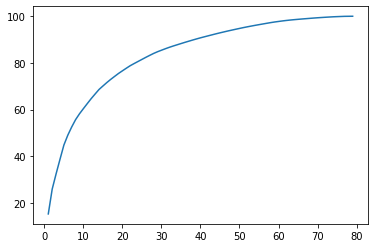

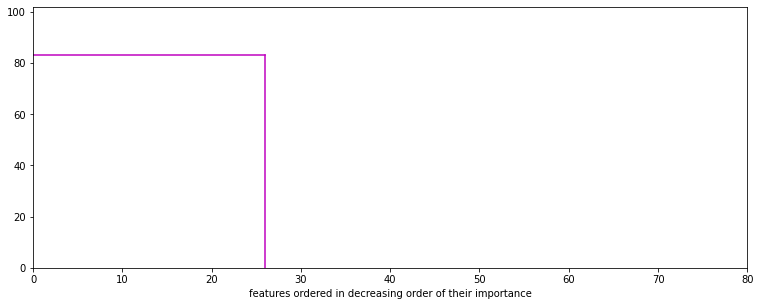

In [50]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(1,80)
plt.plot(x,np.cumsum(sorted(np.array(importances)*100, reverse=True)))

a = 26
b = sum(sorted(importances, reverse=True)[:27])

fig = plt.figure(figsize=(12.8,4.8))
ax2=plt.axes()
ax2.plot((26,26),(0,83.23), 'm')
ax2.plot((0,26),(83.23,83.23), 'm')
ax2.set_xlim([0,80])
ax2.set_ylim([0,102])
ax2.set_xlabel("features ordered in decreasing order of their importance")
plt.show()

In [33]:
b

0.8323741969678247

In [4]:
y_pred_test = rf.predict(X_test)
print("Accuracy on new data: " + str(round( metrics.accuracy_score(y_test, y_pred_test)*100, 2)) + "%") 

Accuracy on new data: 89.33%


In [34]:
%%time
import pickle 
import pandas as pd
import numpy as np
import math
my_data = pd.read_pickle("5log_signature_1cyclePerSec_2015_weeks_8_9")
#drop column of ones
columns = 1 + np.arange(my_data.shape[1] - 1)
my_data = my_data[columns]

#get features
features = [9,4,10,42,60]
X, y = my_data[features], my_data[my_data.shape[1]]

#train dev test 80 10 10
breakpoint1 = int(0.8 * my_data.shape[0])
breakpoint2 = int(0.9 * my_data.shape[0])

X_train, y_train = X[:breakpoint1], y[:breakpoint1]

X_dev, y_dev = X[breakpoint1:breakpoint2], y[breakpoint1:breakpoint2]

X_test, y_test = X[breakpoint2:], y[breakpoint2:]

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42, max_features = math.ceil(math.sqrt(len(features))))
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())


rf.fit(X_train, y_train)

y_pred_dev = rf.predict(X_dev)
y_pred_train = rf.predict(X_train)

from sklearn import metrics
#print("Validation accuracy ", metrics.accuracy_score(y_dev, y_pred_dev))
#print("Accuracy:",metrics.accuracy_score(y_dev, y_pred_dev))
print("Training error: " + str(round( (1 - metrics.accuracy_score(y_train, y_pred_train) )*100, 2)) + "%") 
print("Validation error: " + str(round( (1 - metrics.accuracy_score(y_dev, y_pred_dev) )*100, 2)) + "%") 


importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 3,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
Training error: 0.19%
Validation error: 6.42%
Variable:                    9 Importance: 0.4
Variable:                    4 Importance: 0.22
Variable:                   10 Importance: 0.19
Variable:                   42 Importance: 0.11
Variable:                   60 Importance: 0.08
CPU times: user 6min 47s, sys: 1.75 s, total: 6min 49s
Wall time: 6min 49s


[None, None, None, None, None]

In [35]:
y_pred_test = rf.predict(X_test)
print("Accuracy on new data: " + str(round( metrics.accuracy_score(y_test, y_pred_test)*100, 2)) + "%") 

Accuracy on new data: 86.32%


In [16]:
proportions = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1]
for proportion in proportions:
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(random_state = 42, max_features = math.ceil(math.sqrt(len(top_features))))
    #from pprint import pprint
    #print('Parameters currently in use:\n')
    #pprint(rf.get_params())

    neww_train = new_train[:int(proportion*new_train.shape[0])]
    yy_train = y_train[:int(proportion*new_train.shape[0])]
    rf.fit(neww_train, yy_train)

    new_pred_dev = rf.predict(new_dev)
    new_pred_train = rf.predict(neww_train)

    from sklearn import metrics
    #print("Validation accuracy ", metrics.accuracy_score(y_dev, y_pred_dev))
    #print("Accuracy:",metrics.accuracy_score(y_dev, y_pred_dev))
    print("For " + str(proportion) + " we have the following: ")
    print("Training error: " + str(round( (1 - metrics.accuracy_score(yy_train, new_pred_train) )*100, 2)) + "%") 
    print("Validation error: " + str(round( (1 - metrics.accuracy_score(y_dev, new_pred_dev) )*100, 2)) + "%") 
    print("---")



For 0.6 we have the following: 
Training error: 0.22%
Validation error: 12.46%
---
For 0.7 we have the following: 
Training error: 0.21%
Validation error: 12.56%
---
For 0.8 we have the following: 
Training error: 0.2%
Validation error: 13.11%
---
For 0.9 we have the following: 
Training error: 0.2%
Validation error: 11.77%
---
For 1 we have the following: 
Training error: 0.19%
Validation error: 11.55%
---


In [17]:
from matplotlib import pyplot as plt

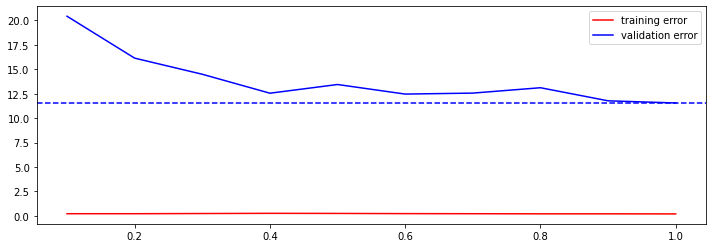

Text(0.5, 1.0, 'RF model 60 - 20 - 20 (ignoring test data for now), top 5 features, max_features = 3')

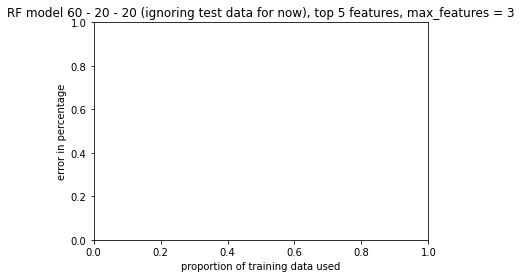

In [44]:
training = [0.21, 0.21, 0.23, 0.25, 0.24, 0.22, 0.21, 0.2, 0.2, 0.19]
validation = [20.43, 16.14, 14.49, 12.55, 13.44, 12.46, 12.56, 13.11, 11.77, 11.55]
proportions = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

fig = plt.figure(figsize = (12,4))

training_plot, = plt.plot(proportions, training, 'r-')
validation_plot, = plt.plot(proportions, validation, 'b-')
plt.legend([training_plot, validation_plot],["training error", "validation error"])
plt.axhline(y=min(validation), color='b', linestyle='--')
plt.show()
plt.xlabel("proportion of training data used")
plt.ylabel("error in percentage")
plt.title("RF model 60 - 20 - 20 (ignoring test data for now), top 5 features, max_features = 3")

Text(0.5, 1.0, 'RF model 60 - 20 - 20 (ignoring test data for now), top 5 features, max_features = 3, min_samples_leaf tuned')

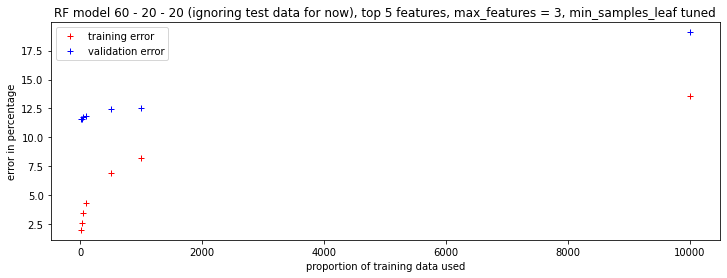

In [27]:
validation_error = [11.61, 11.61, 11.8, 11.82, 12.46, 12.58, 19.08]
training_error = [2.02, 2.64, 3.51, 4.33, 6.96, 8.2, 13.58]
min_samples_leaf = [10, 20, 50, 100, 500, 1000, 10000]

validation_error = [11.55, 11.61, 11.82, ]
training_error = [0.19, 2.02, 4.33, 8.2, 13.58]
min_samples_leaf = [1, 10, 20, 50, 100, 500, 1000, 10000]

fig = plt.figure(figsize = (12,4))

training_plot, = plt.plot(min_samples_leaf, training_error, 'r+')
validation_plot, = plt.plot(min_samples_leaf, validation_error, 'b+')
plt.legend([training_plot, validation_plot],["training error", "validation error"])
plt.xlabel("proportion of training data used")
plt.ylabel("error in percentage")
plt.title("RF model 60 - 20 - 20 (ignoring test data for now), top 5 features, max_features = 3, min_samples_leaf tuned")

# First and foremost, select signature degree using untuned hyperparameters

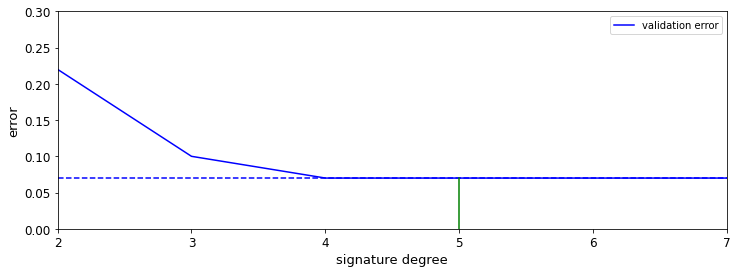

<Figure size 432x288 with 0 Axes>

In [4]:
from pathlib import Path
from matplotlib.pyplot import figure, draw
from matplotlib import pyplot as plt
fn = Path('/scratch/iliant/sigdeg.svg').expanduser()







import matplotlib.pyplot as plt
import numpy as np
training = []
validation = [21.56, 9.55, 7.4, 7.1, 7.28, 7.12]
validation = np.round(np.array(validation)/100,2)
sigdeg = [2, 3, 4, 5, 6, 7]

fig2 = plt.figure(figsize = (12,4))

#training_plot, = plt.plot(sigdeg, training, 'r-');
validation_plot, = plt.plot(sigdeg, validation, 'b-');
plt.legend([validation_plot],["validation error"])
plt.axhline(y=min(validation), color='b', linestyle='--')
#plt.axhline(y=7.28, color='g', linestyle='--')
#plt.axhline(y=min(training), color = 'r', linestyle='--')
plt.plot((5, 5), (0, 0.07), 'g-');
plt.xlabel("signature degree", fontsize=13)
plt.ylabel("error", fontsize = 13)
plt.tick_params(labelsize = 'large')
#plt.title("RF model 60 - 20 - 20, top 26 features, max_features = 6")
plt.ylim([0,0.3])
plt.xlim([2,7])
plt.show()

draw() # necessary to render figure before saving
fig2.savefig(fn, bbox_inches='tight')




# Select top 26 features

The 5th signature degree got a better result than the 6th signature degree.
In the 6th signature model, the 27th feature does not belong to the 5th degree set of columns.
Thus we select the top 26 features for the rest of the model.

In [2]:
%%time

feature = [9,4,60,7,10,42,17,5,23,25,29,51,2,11,15,18,22,30,39,41,44,46,52,54,57,66]

for proportion in [1]:
    features = feature[:int(proportion*len(feature))]

    X, y = my_data[features], my_data[my_data.shape[1]]

    #train dev test 60 20 20
    breakpoint1 = int(0.6 * my_data.shape[0])
    breakpoint2 = int(0.8 * my_data.shape[0])

    X_train, y_train = X[:breakpoint1], y[:breakpoint1]

    X_dev, y_dev = X[breakpoint1:breakpoint2], y[breakpoint1:breakpoint2]

    X_test, y_test = X[breakpoint2:], y[breakpoint2:]
    
    

    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(random_state = 42, max_features = math.ceil(math.sqrt(len(features))), max_depth = 29)
    #from pprint import pprint
    #print('Parameters currently in use:\n')
    #pprint(rf.get_params())


    rf.fit(X_train, y_train)

    y_pred_dev = rf.predict(X_dev)
    y_pred_train = rf.predict(X_train)


    y_pred_test = rf.predict(X_test)

    predictions_all = np.array([tree.predict(X_dev) for tree in rf.estimators_])

    #from sklearn import metrics
    #print("Validation accuracy ", metrics.accuracy_score(y_dev, y_pred_dev))
    #print("Accuracy:",metrics.accuracy_score(y_dev, y_pred_dev))
    #print("Training error: " + str(round( (1 - metrics.accuracy_score(y_train, y_pred_train) )*100, 2)) + "%") 
    #print("Validation error: " + str(round( (1 - metrics.accuracy_score(y_dev, y_pred_dev) )*100, 2)) + "%") 
    

    #importances = list(rf.feature_importances_)
    #feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]
    #feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    #[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

CPU times: user 7min 28s, sys: 1.15 s, total: 7min 29s
Wall time: 7min 29s


In [12]:
import pickle 

pd.DataFrame(y_test).to_pickle("test_RF")

In [4]:
distributions = np.empty(0)
for i in range(247174):
    distributions = np.append(distributions, (100-sum(predictions_all[:,i]))/100)

KeyboardInterrupt: 

In [37]:
print(distributions.shape)
print(y_dev.shape)

(247174,)
(247174,)


In [13]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_dev, distributions, pos_label=0)

In [48]:
print(np.where(thresholds > 0.45))
print(np.where(thresholds < 0.55))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55]),)
(array([ 47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101]),)


In [52]:
print(thresholds[50])
print(fpr[50])
print(tpr[50])

0.51
0.052558155756286404
0.9197179435309077


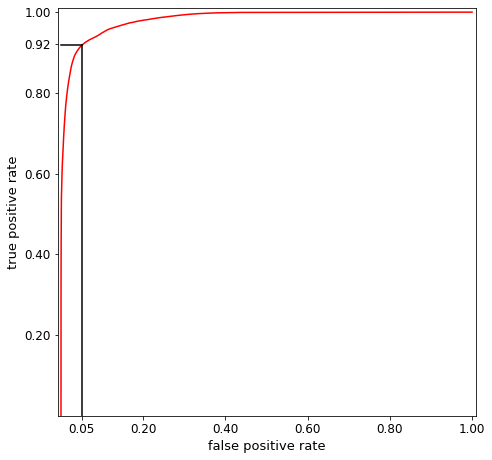

In [20]:
from pathlib import Path
from matplotlib.pyplot import figure, draw
from matplotlib import pyplot as plt
fn = Path('/scratch/iliant/ROC4.svg').expanduser()



import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7.5,7.5))
#ax.scatter(fpr[::100][:9], tpr[::100][:9], c='blue')
#ax.scatter(fpr[::100][10:], tpr[::100][10:], c='blue')
ax.plot(fpr, tpr, 'r-')
ax.set_xlabel("false positive rate", fontsize=13)
ax.set_ylabel("true positive rate", fontsize=13)

ax.plot((0.052, 0.052), (0,0.919), 'k')
#ax.plot((0.037, 0.037), (0,0.917), 'k')
ax.plot((0, 0.052), (0.919, 0.919), 'k')
#ax.plot((0, 0.037), (0.917, 0.917), 'k')
ax.set_xlim([-0.008,1.01])
ax.set_ylim([0,1.01])
#ax.annotate("0.5", (0.065, 0.95))
#ax.annotate("0.74", (0.037, 0.917))
plt.xticks([0.05, 0.2, 0.4, 0.6, 0.8, 1])
plt.yticks([0.2, 0.4, 0.6, 0.8, 0.92 ,1])
plt.tick_params(labelsize='large')
#for i, txt in enumerate(np.around(thresholds[::150], 3)):
    #ax.annotate(txt, (fpr[i*150], tpr[i*150]))
    
draw() # necessary to render figure before saving
fig.savefig(fn, bbox_inches='tight')



In [102]:
y_pred_test = rf.predict(X_test)
print("Training error: " + str(round( (1 - metrics.accuracy_score(y_test, y_pred_test) )*100, 2)) + "%") 

Training error: 10.59%


In [104]:

pd.DataFrame(y_pred_test).to_pickle("final_RF_predictions")

# See learning curve as proportion of training data used without tuning any of the parameters.

In [39]:
proportions = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1]
for proportion in proportions:
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(random_state = 42, max_features = math.ceil(math.sqrt(len(top_features))))
    #from pprint import pprint
    #print('Parameters currently in use:\n')
    #pprint(rf.get_params())

    neww_train = X_train[:int(proportion*X_train.shape[0])]
    yy_train = y_train[:int(proportion*y_train.shape[0])]
    rf.fit(neww_train, yy_train)

    new_pred_dev = rf.predict(X_dev)
    new_pred_train = rf.predict(neww_train)

    from sklearn import metrics
    #print("Validation accuracy ", metrics.accuracy_score(y_dev, y_pred_dev))
    #print("Accuracy:",metrics.accuracy_score(y_dev, y_pred_dev))
    print("For " + str(proportion) + " we have the following: ")
    print("Training error: " + str(round( (1 - metrics.accuracy_score(yy_train, new_pred_train) )*100, 2)) + "%") 
    print("Validation error: " + str(round( (1 - metrics.accuracy_score(y_dev, new_pred_dev) )*100, 2)) + "%") 
    print("---")




For 0.1 we have the following: 
Training error: 0.0%
Validation error: 20.3%
---
For 0.2 we have the following: 
Training error: 0.0%
Validation error: 15.42%
---
For 0.3 we have the following: 
Training error: 0.0%
Validation error: 14.59%
---
For 0.4 we have the following: 
Training error: 0.01%
Validation error: 10.53%
---
For 0.5 we have the following: 
Training error: 0.01%
Validation error: 10.36%
---
For 0.6 we have the following: 
Training error: 0.01%
Validation error: 9.43%
---
For 0.7 we have the following: 
Training error: 0.01%
Validation error: 9.08%
---
For 0.8 we have the following: 
Training error: 0.01%
Validation error: 8.1%
---
For 0.9 we have the following: 
Training error: 0.01%
Validation error: 8.1%
---
For 1 we have the following: 
Training error: 0.01%
Validation error: 6.98%
---


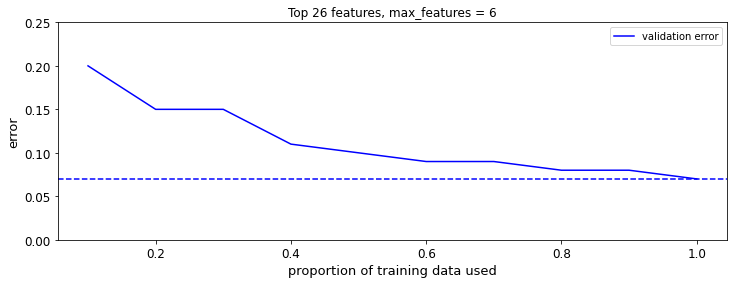

<Figure size 432x288 with 0 Axes>

In [7]:
from pathlib import Path
from matplotlib.pyplot import figure, draw
from matplotlib import pyplot as plt
fn = Path('/scratch/iliant/lrcurve.svg').expanduser()




training = [0, 0, 0, 0, 0, 0.01, 0.01, 0.01, 0.01, 0]
validation = [20.3, 15.42, 14.59, 10.53, 10.36, 9.43, 9.08, 8.01, 8.01, 6.98]
proportions = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

fig2 = plt.figure(figsize = (12,4))
validation = np.round(np.array(validation)/100,2)
#training_plot, = plt.plot(proportions, training, 'r-');
validation_plot, = plt.plot(proportions, validation, 'b-');
plt.legend([validation_plot],["validation error"])
plt.axhline(y=min(validation), color='b', linestyle='--')

plt.xlabel("proportion of training data used", fontsize=13)
plt.ylabel("error", fontsize=13)
plt.tick_params(labelsize='large')
plt.title("Top 26 features, max_features = 6")
plt.ylim([0,0.25])
plt.show()


draw() # necessary to render figure before saving
fig2.savefig(fn, bbox_inches='tight')



# Now that we know that we can use all our training data for training, let's see if we overfit.

In [42]:
depths = [1, 5, 9, 13, 17, 21, 25, 29]
for depth in depths:
    from sklearn.ensemble import RandomForestClassifier
    breakpoint1 = int(0.6 * my_data.shape[0])
    

    X_train, y_train = X[:breakpoint1], y[:breakpoint1]

    X_dev, y_dev = X[breakpoint1:breakpoint2], y[breakpoint1:breakpoint2]

    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(random_state = 42, max_features = math.ceil(math.sqrt(len(features))), max_depth = depth)
    from pprint import pprint
    print('Parameters currently in use:\n')
    pprint(rf.get_params())


    rf.fit(X_train, y_train)

    y_pred_dev = rf.predict(X_dev)
    y_pred_train = rf.predict(X_train)

    from sklearn import metrics
    #print("Validation accuracy ", metrics.accuracy_score(y_dev, y_pred_dev))
    #print("Accuracy:",metrics.accuracy_score(y_dev, y_pred_dev))
    print("For " + str(depth) + " we have: ")
    print("Training error: " + str(round( (1 - metrics.accuracy_score(y_train, y_pred_train) )*100, 2)) + "%") 
    print("Validation error: " + str(round( (1 - metrics.accuracy_score(y_dev, y_pred_dev) )*100, 2)) + "%") 






Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 6,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
For 1 we have: 
Training error: 24.68%
Validation error: 31.16%
Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 6,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
For 5 we have: 
Tr

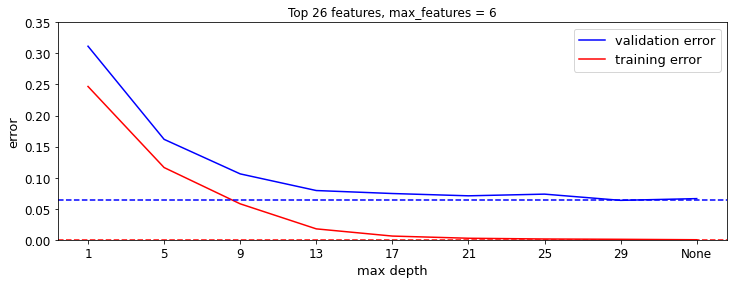

<Figure size 432x288 with 0 Axes>

In [8]:
from pathlib import Path
from matplotlib.pyplot import figure, draw
from matplotlib import pyplot as plt
fn = Path('/scratch/iliant/maxdepth.svg').expanduser()







training = [24.68, 11.63, 5.79, 1.76, 0.6, 0.25, 0.13, 0.08, 0.01]
validation = [31.16, 16.17, 10.61, 7.93, 7.45, 7.08, 7.35, 6.35, 6.63 ]
depths = [1, 5, 9, 13, 17, 21, 25, 29, "None"]

fig2 = plt.figure(figsize = (12,4))

training = np.array(training)
validation = np.array(validation)

training_plot, = plt.plot(depths, training/100, 'r-');
validation_plot, = plt.plot(depths, validation/100, 'b-');
plt.legend([validation_plot, training_plot],["validation error", "training error"], fontsize=13)
plt.axhline(y=min(validation/100), color='b', linestyle='--')
plt.axhline(y=min(training/100), color = 'r', linestyle='--')
plt.xlabel("max depth", fontsize=13)
plt.ylabel("error", fontsize=13)
plt.tick_params(labelsize='large')
plt.title("Top 26 features, max_features = 6")
plt.ylim([0,0.35])
plt.show()


draw() # necessary to render figure before saving
fig2.savefig(fn, bbox_inches='tight')



# Tune the min samples leaf using max depth 29 from previous plot




In [71]:
min_samples_leafs = np.array([1, 10, 100, 500, 1000, 2000, 3500, 5500, 8000])
for min_samples_leaf in min_samples_leafs:
    from sklearn.ensemble import RandomForestClassifier
    breakpoint1 = int(0.6 * my_data.shape[0])
    breakpoint2 = int(0.8*my_data.shape[0])

    X_train, y_train = X[:breakpoint1], y[:breakpoint1]

    X_dev, y_dev = X[breakpoint1:breakpoint2], y[breakpoint1:breakpoint2]

    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(random_state = 42, max_features = math.ceil(math.sqrt(len(features))), max_depth = 29, min_samples_leaf = min_samples_leaf)
    from pprint import pprint
    print('Parameters currently in use:\n')
    pprint(rf.get_params())


    rf.fit(X_train, y_train)

    y_pred_dev = rf.predict(X_dev)
    y_pred_train = rf.predict(X_train)

    from sklearn import metrics
    #print("Validation accuracy ", metrics.accuracy_score(y_dev, y_pred_dev))
    #print("Accuracy:",metrics.accuracy_score(y_dev, y_pred_dev))
    print("For " + str(min_sample_leaf) + " we have: ")
    print("Training error: " + str(round( (1 - metrics.accuracy_score(y_train, y_pred_train) )*100, 2)) + "%") 
    print("Validation error: " + str(round( (1 - metrics.accuracy_score(y_dev, y_pred_dev) )*100, 2)) + "%") 

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 29,
 'max_features': 6,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
For 2 we have: 
Training error: 0.08%
Validation error: 6.5%
Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 29,
 'max_features': 6,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
For 2 we have: 
Tr

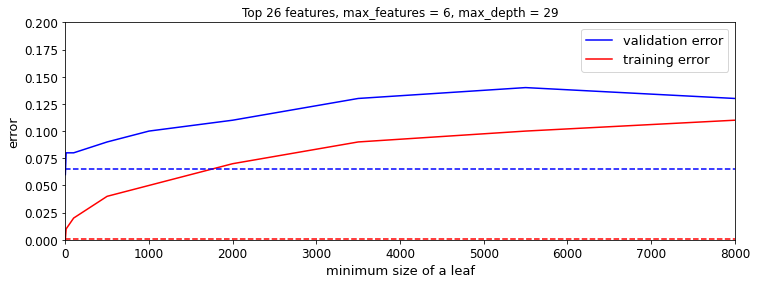

<Figure size 432x288 with 0 Axes>

In [22]:
from pathlib import Path
from matplotlib.pyplot import figure, draw
from matplotlib import pyplot as plt
fn = Path('/scratch/iliant/minleaf.svg').expanduser()



training = [0.08, 0.7, 2.05, 3.84, 5.08, 6.64, 8.77, 10.37, 11.25]
validation = [6.5, 7.5, 8.26, 9.43, 10,  11.17, 12.57,13.56, 12.99 ]
leaf = [1, 10, 100, 500, 1000, 2000, 3500, 5500, 8000]

fig2 = plt.figure(figsize = (12,4))

training=np.array(training)
validation=np.array(validation)

training_plot, = plt.plot(leaf, np.round(training/100,2), 'r-');
validation_plot, = plt.plot(leaf, np.round(validation/100,2), 'b-');
plt.legend([validation_plot, training_plot],["validation error", "training error"], fontsize=13)
plt.axhline(y=min(validation/100), color='b', linestyle='--')
plt.axhline(y=min(training/100), color = 'r', linestyle='--')
plt.xlabel("minimum size of a leaf", fontsize=13)
plt.ylabel("error", fontsize=13)
plt.title("Top 26 features, max_features = 6, max_depth = 29")
plt.tick_params(labelsize='large')
plt.ylim([0,0.2])
plt.xlim([-1,8000])
plt.show()

draw() # necessary to render figure before saving
fig2.savefig(fn, bbox_inches='tight')




In [100]:
for i in range(1):
    from sklearn.ensemble import RandomForestClassifier
    breakpoint1 = int(0.6 * my_data.shape[0])
    breakpoint2 = int(0.8*my_data.shape[0])

    X_train, y_train = X[:breakpoint1], y[:breakpoint1]

    X_dev, y_dev = X[breakpoint1:breakpoint2], y[breakpoint1:breakpoint2]

    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(random_state = 42, max_features = math.ceil(math.sqrt(len(features))), max_depth = 29, min_samples_leaf = min_samples_leaf)
    from pprint import pprint
    print('Parameters currently in use:\n')
    pprint(rf.get_params())


    rf.fit(X_train, y_train)

    y_pred_dev = rf.predict(X_dev)
    y_pred_train = rf.predict(X_train)

    from sklearn import metrics
    #print("Validation accuracy ", metrics.accuracy_score(y_dev, y_pred_dev))
    #print("Accuracy:",metrics.accuracy_score(y_dev, y_pred_dev))
    print("For " + str(min_sample_leaf) + " we have: ")
    print("Training error: " + str(round( (1 - metrics.accuracy_score(y_train, y_pred_train) )*100, 2)) + "%") 
    print("Validation error: " + str(round( (1 - metrics.accuracy_score(y_dev, y_pred_dev) )*100, 2)) + "%") 

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 29,
 'max_features': 9,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 8000,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


KeyboardInterrupt: 

In [2]:
X_train.shape

(741522, 79)

In [3]:
X_dev.shape

(247174, 79)

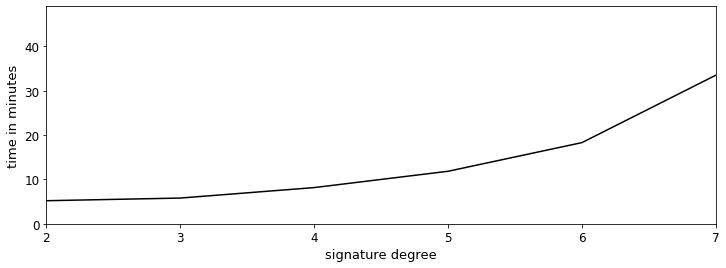

<Figure size 432x288 with 0 Axes>

In [6]:
from pathlib import Path
from matplotlib.pyplot import figure, draw
from matplotlib import pyplot as plt
fn = Path('/scratch/iliant/sigtime.svg').expanduser()








import matplotlib.pyplot as plt
#training = [0.08, 0.7, 2.05, 3.84, 5.08, 6.64, 8.77, 10.37, 11.25]
validation = [5.2, 5.8, 8.16,  11.84, 18.3, 33.5 ]
deg = [2, 3, 4, 5, 6, 7]

fig2 = plt.figure(figsize = (12,4))

#training_plot, = plt.plot(deg, training, 'k-');
validation_plot, = plt.plot(deg, validation, 'k-');
#plt.legend([validation_plot],["time"])
#plt.axhline(y=min(validation), color='b', linestyle='--')
#plt.axhline(y=min(training), color = 'r', linestyle='--')
plt.xlabel("signature degree", fontsize=13)
plt.ylabel("time in minutes",fontsize=13)
plt.tick_params(labelsize='large')
#plt.title("Top 26 features, max_features = 6, max_depth = 29")
plt.ylim([0,49])
plt.xlim([2,7])
plt.show()

draw() # necessary to render figure before saving
fig2.savefig(fn, bbox_inches='tight')



In [12]:
X_train.head()

,9,4,60,7,10,42,17,5,23,25,...,22,30,39,41,44,46,52,54,57,66
index,,,,,,,,,,,,,,,,,,,,,
1,0.000699,0.001479,0.000198,0.001326,0.003939,0.000157,0.000272,-0.012129,0.002417,0.000120,...,0.003354,0.000013,0.000118,0.000067,0.000275,0.000376,-0.000529,0.000237,0.000115,0.000400
2,0.000685,0.001454,0.000191,0.001324,0.003903,0.000160,0.000269,-0.012099,0.002401,0.000105,...,0.003343,0.000013,0.000117,0.000069,0.000274,0.000374,-0.000524,0.000238,0.000100,0.000396
3,0.000657,0.001426,0.000184,0.001308,0.003863,0.000154,0.000271,-0.012192,0.002410,0.000100,...,0.003369,0.000013,0.000116,0.000063,0.000270,0.000369,-0.000517,0.000233,0.000076,0.000391
4,0.000672,0.001537,0.000181,0.001326,0.003907,0.000159,0.000278,-0.012113,0.002424,0.000110,...,0.003358,0.000012,0.000117,0.000071,0.000274,0.000375,-0.000523,0.000240,0.000089,0.000397
5,0.000678,0.001488,0.000194,0.001328,0.003929,0.000158,0.000269,-0.012189,0.002415,0.000123,...,0.003366,0.000013,0.000118,0.000066,0.000275,0.000377,-0.000528,0.000237,0.000103,0.000399


In [15]:
X_train[1822:1824]

,9,4,60,7,10,42,17,5,23,25,...,22,30,39,41,44,46,52,54,57,66
index,,,,,,,,,,,,,,,,,,,,,
1823,0.000343,0.001095,0.000078,0.000803,0.002382,0.000084,0.000212,-0.009663,0.001917,0.000058,...,0.002654,0.000003,0.000069,0.000056,0.000166,0.000229,-0.000321,0.000145,0.000089,0.000249
1824,0.001560,-0.000453,0.000417,0.001696,0.004855,0.000307,0.000025,-0.009909,0.001416,-0.000302,...,0.002366,0.000015,0.000163,0.000118,0.000346,0.000447,-0.000645,0.000306,0.000239,0.000476


/home/iliant/.virtualenvs/dale/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


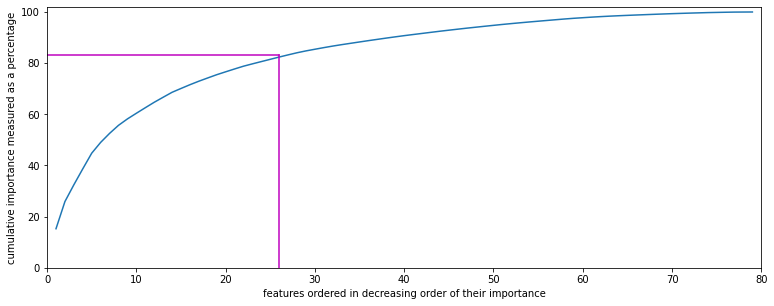

In [54]:
import numpy as np
import matplotlib.pyplot as plt

a = 26
b = sum(sorted(importances, reverse=True)[:27])

fig = plt.figure(figsize=(12.8,4.8))
x=np.arange(1,80)
plt.plot(x,np.cumsum(sorted(np.array(importances)*100, reverse=True)))


ax2=plt.axes()
ax2.plot((26,26),(0,83.23), 'm')
ax2.plot((0,26),(83.23,83.23), 'm')
ax2.set_xlim([0,80])
ax2.set_ylim([0,102])
ax2.set_xlabel("features ordered in decreasing order of their importance")
ax2.set_ylabel("cumulative importance measured as a percentage")
plt.show()

In [6]:
%%time
import pickle 
import pandas as pd
import numpy as np
import math
my_data = pd.read_pickle("5log_signature_1cyclePerSec_2015_weeks_8_9")
#drop column of ones
columns = 1 + np.arange(my_data.shape[1] - 1)
my_data = my_data[columns]

#get features
features = 1 + np.arange(my_data.shape[1] - 1)
X, y = my_data[features], my_data[my_data.shape[1]]

#train dev test 60 20 20
breakpoint1 = int(0.6 * my_data.shape[0])
breakpoint2 = int(0.8 * my_data.shape[0])

X_train, y_train = X[:breakpoint1], y[:breakpoint1]

X_dev, y_dev = X[breakpoint1:breakpoint2], y[breakpoint1:breakpoint2]

X_test, y_test = X[breakpoint2:], y[breakpoint2:]

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42, max_features = math.ceil(math.sqrt(len(features))), n_estimators = 100)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())


rf.fit(X_train, y_train)

y_pred_dev = rf.predict(X_dev)
y_pred_train = rf.predict(X_train)

predictions_all = np.array([tree.predict(X_dev) for tree in rf.estimators_])

from sklearn import metrics
#print("Validation accuracy ", metrics.accuracy_score(y_dev, y_pred_dev))
#print("Accuracy:",metrics.accuracy_score(y_dev, y_pred_dev))
print("Training error: " + str(round( (1 - metrics.accuracy_score(y_train, y_pred_train) )*100, 2)) + "%") 
print("Validation error: " + str(round( (1 - metrics.accuracy_score(y_dev, y_pred_dev) )*100, 2)) + "%") 


importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 9,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 2,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


KeyError: 0

In [8]:
X_dev.iloc[0]

1    -2.076828e-02
2    -8.115768e-04
3    -1.860354e-02
4    -5.869944e-04
5    -1.224566e-02
          ...     
75    5.967928e-07
76    1.714594e-05
77    4.929933e-08
78    6.484321e-07
79   -1.412281e-09
Name: 741523, Length: 79, dtype: float64

ValueError: cannot reshape array of size 1 into shape (79,)

In [18]:
np.array(X_dev.iloc[0]).reshape(79)

(1, 79)

In [21]:
predictions_all = np.array([tree.predict(X_dev) for tree in rf.estimators_])